In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img


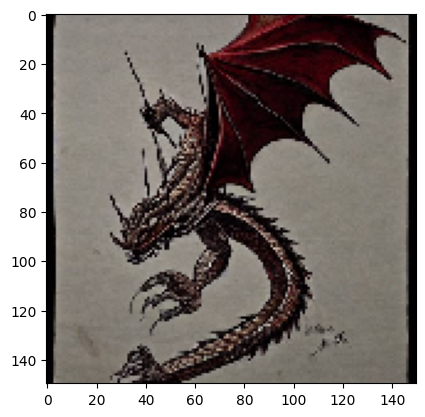

In [2]:
image_example = 'train/dragon/000bf8e2-6467-462f-b4c8-61c78f94241b.jpg'

img = load_img(image_example, target_size=(150,150,3))

plt.imshow(img);

## Model

In [3]:
inputs = keras.Input(shape = (150,150,3))
x = keras.layers.Conv2D(32, (3,3), activation = 'relu')(inputs)
x = keras.layers.MaxPooling2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation = 'relu')(x)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

In [4]:
model = keras.Model(inputs = inputs, outputs = outputs)
lr= 0.002
momentum= 0.9
optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
#Q1: Since we have a binary classification problem, the best loss function is binary_crossentropy
model.compile(optimizer = keras.optimizers.SGD(lr=lr, momentum=momentum), loss = 'binary_crossentropy', metrics = ['accuracy'])



c:\Users\User\anaconda3\envs\mlbookcamp\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
#Total number of parameters of the model 
model.summary()

## Q2:11215873

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

In [6]:
##Generators and Training
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = True,
)

validation_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = True,
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [7]:
##Training 
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
80/80 [==============================] - 20s 241ms/step - loss: 0.6545 - accuracy: 0.5885 - val_loss: 0.5653 - val_accuracy: 0.6904
Epoch 2/10
80/80 [==============================] - 11s 141ms/step - loss: 0.4994 - accuracy: 0.7585 - val_loss: 0.3937 - val_accuracy: 0.8655
Epoch 3/10
80/80 [==============================] - 11s 139ms/step - loss: 0.3678 - accuracy: 0.8363 - val_loss: 0.3274 - val_accuracy: 0.8604
Epoch 4/10
80/80 [==============================] - 13s 166ms/step - loss: 0.3018 - accuracy: 0.8770 - val_loss: 0.3028 - val_accuracy: 0.8756
Epoch 5/10
80/80 [==============================] - 13s 165ms/step - loss: 0.2623 - accuracy: 0.9059 - val_loss: 0.2793 - val_accuracy: 0.8883
Epoch 6/10
80/80 [==============================] - 11s 140ms/step - loss: 0.2199 - accuracy: 0.9159 - val_loss: 0.5195 - val_accuracy: 0.7589
Epoch 7/10
80/80 [==============================] - 11s 140ms/step - loss: 0.2108 - accuracy: 0.9197 - val_loss: 0.2731 - val_accuracy: 0.8883

Q3: 0.9109159409999847


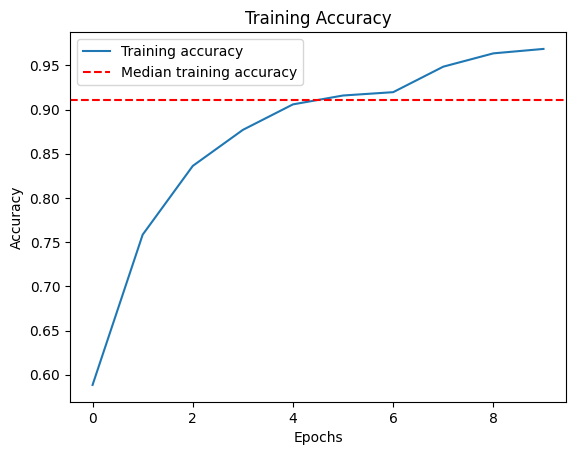

In [26]:
#Median of training accuracy for all the epochs

print('Q3:', np.median(history.history['accuracy']))

plt.plot(history.history['accuracy'], label = 'Training accuracy');
plt.axhline(y = np.median(history.history['accuracy']), color = 'red', linestyle = '--', label = 'Median training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy');


Q4: 0.1674624480189468


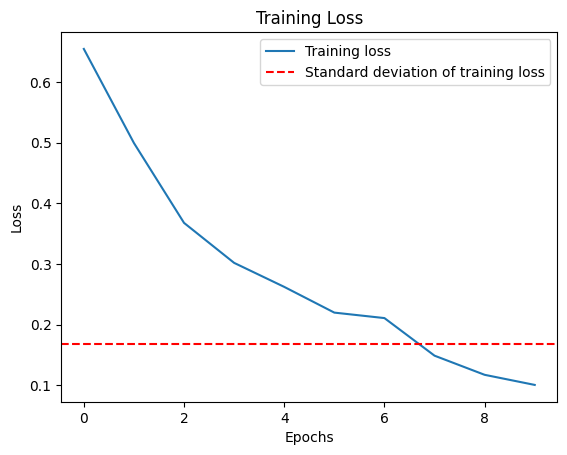

In [28]:
#Standard desviation of training loss
print('Q4:', np.std(history.history['loss']))

plt.plot(history.history['loss'], label = 'Training loss')
plt.axhline(y = np.std(history.history['loss']), color = 'red', linestyle = '--', label = 'Standard deviation of training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss');

## Data Augmentation

In [29]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (150,150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (150,150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'binary'
)


Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [31]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)


Epoch 1/10
80/80 [==============================] - 18s 226ms/step - loss: 0.4092 - accuracy: 0.8199 - val_loss: 0.4927 - val_accuracy: 0.7716
Epoch 2/10
80/80 [==============================] - 20s 249ms/step - loss: 0.4036 - accuracy: 0.8181 - val_loss: 0.4591 - val_accuracy: 0.7716
Epoch 3/10
80/80 [==============================] - 22s 271ms/step - loss: 0.4073 - accuracy: 0.8206 - val_loss: 0.3452 - val_accuracy: 0.8503
Epoch 4/10
80/80 [==============================] - 20s 249ms/step - loss: 0.3502 - accuracy: 0.8551 - val_loss: 0.2858 - val_accuracy: 0.8832
Epoch 5/10
80/80 [==============================] - 19s 240ms/step - loss: 0.4083 - accuracy: 0.8225 - val_loss: 0.6999 - val_accuracy: 0.7208
Epoch 6/10
80/80 [==============================] - 20s 247ms/step - loss: 0.3635 - accuracy: 0.8444 - val_loss: 0.4944 - val_accuracy: 0.7868
Epoch 7/10
80/80 [==============================] - 20s 247ms/step - loss: 0.3352 - accuracy: 0.8607 - val_loss: 0.5190 - val_accuracy: 0.7944

Q5: 0.4251581817865372


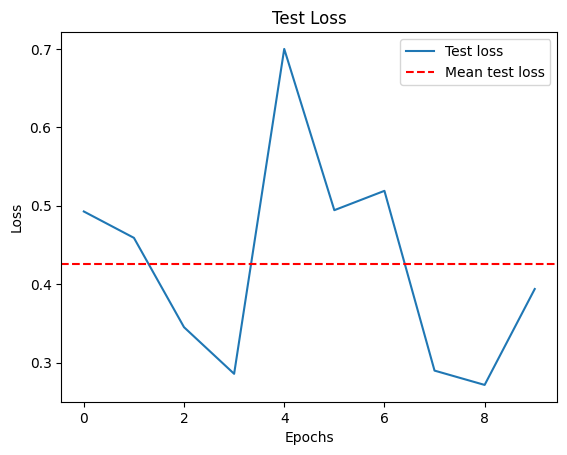

In [32]:
##Mean of test loss 
print('Q5:', np.mean(history.history['val_loss']))

plt.plot(history.history['val_loss'], label = 'Test loss')
plt.axhline(y = np.mean(history.history['val_loss']), color = 'red', linestyle = '--', label = 'Mean test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Test Loss');


What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

Q6: 0.8200507700443268


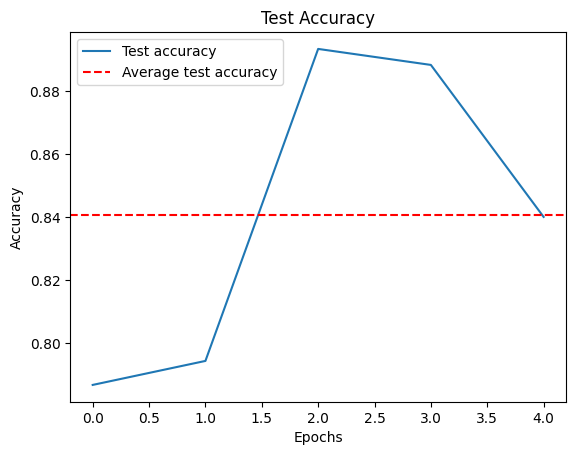

In [35]:
# Average 
np.average(history.history['val_accuracy'][-5:])

print('Q6:', np.average(history.history['val_accuracy']))

plt.plot(history.history['val_accuracy'][-5:], label = 'Test accuracy')
plt.axhline(y = np.average(history.history['val_accuracy'][-5:]), color = 'red', linestyle = '--', label = 'Average test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy');
